<a href="https://cognitiveclass.ai"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width = 400> </a>

<h1 align=center><font size = 5>Peer Review Final Assignment</font></h1>


## Introduction


In this lab, you will build an image classifier using the VGG16 pre-trained model, and you will evaluate it and compare its performance to the model we built in the last module using the ResNet50 pre-trained model. Good luck!


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item41">Download Data
2. <a href="#item42">Part 1</a>
3. <a href="#item43">Part 2</a>
4. <a href="#item44">Part 3</a>

</font>
    
</div>


In [ ]:
#!pip install tensorflow numpy matplotlib Pillow wget

<a id="item41"></a>


## Download Data


Use the <code>wget</code> command to download the data for this assignment from here: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip


Use the following cells to download the data.


In [ ]:

!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip
!unzip -q concrete_data_week4.zip

After you unzip the data, you fill find the data has already been divided into a train, validation, and test sets.


<a id="item42"></a>


## Part 1


In this part, you will design a classifier using the VGG16 pre-trained model. Just like the ResNet50 model, you can import the model <code>VGG16</code> from <code>keras.applications</code>.


You will essentially build your classifier as follows:

1. Import libraries, modules, and packages you will need. Make sure to import the _preprocess_input_ function from <code>keras.applications.vgg16</code>.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the mode using the adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.


Use the following cells to create your classifier.


In [ ]:
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from PIL import Image

In [ ]:
batch_size = 100
img_width, img_height = 224, 224


In [ ]:

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    'concrete_data_week4/train',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    'concrete_data_week4/valid',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)



In [ ]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

model = Sequential()

model.add(vgg_model)

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
max_steps_per_epoch = 10
max_validation_steps = 10
model.fit(
    train_generator,
    steps_per_epoch=max_steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=max_validation_steps,
    epochs=10
)


Epoch 1/10


c:\Users\zonda\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1000s 100s/step - accuracy: 0.8517 - loss: 0.4074 - val_accuracy: 0.7230 - val_loss: 1.1425
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 894s 94s/step - accuracy: 0.9728 - loss: 0.0679 - val_accuracy: 0.9840 - val_loss: 0.0644
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 938s 99s/step - accuracy: 0.9917 - loss: 0.0347 - val_accuracy: 0.9840 - val_loss: 0.0698
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 966s 102s/step - accuracy: 0.9993 - loss: 0.0070 - val_accuracy: 0.9920 - val_loss: 0.0316
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 938s 99s/step - accuracy: 0.9883 - loss: 0.0437 - val_accuracy: 0.9870 - val_loss: 0.0483
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 929s 98s/step - accuracy: 0.9937 - loss: 0.0342 - val_accuracy: 0.9900 - val_loss: 0.0561
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 937s 99s/step - accuracy: 0.9928 - loss: 0.0140 - val_accuracy: 0.9960 - val_loss: 0.0165
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 935s 99s/step - accuracy: 0.9927 - loss: 0.0186 - val_accuracy: 0.9960 - v

c:\Users\zonda\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


In [8]:
model.save("TrainedModel.keras")

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,653,064 (204.67 MB)

 Trainable params: 12,978,946 (49.51 MB)

 Non-trainable params: 14,716,224 (56.14 MB)

 Optimizer params: 25,957,894 (99.02 MB)

In [10]:
print(f"Кількість зображень для навчання: {train_generator.samples}")

Кількість зображень для навчання: 30001


<a id="item43"></a>


## Part 2


In this part, you will evaluate your deep learning models on a test data. For this part, you will need to do the following:

1. Load your saved model that was built using the ResNet50 model.
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, you only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.
3. Use the **evaluate_generator** method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. You can learn more about **evaluate_generator** [here](https://keras.io/models/sequential/).
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.


Use the following cells to evaluate your models.


In [11]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


resnet_model = load_model('TrainedModel.keras')
vgg_model = load_model('TrainedModel.keras')

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    'concrete_data_week4/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

resnet_score = resnet_model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
vgg_score = vgg_model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

print(f"ResNet50 Model Accuracy: {resnet_score[1] * 100:.2f}%")
print(f"ResNet50 Model Loss: {resnet_score[0]:.4f}")

print(f"VGG16 Model Accuracy: {vgg_score[1] * 100:.2f}%")
print(f"VGG16 Model Loss: {vgg_score[0]:.4f}")


Found 500 images belonging to 2 classes.
15/15 ━━━━━━━━━━━━━━━━━━━━ 222s 15s/step - accuracy: 0.9991 - loss: 0.0129
15/15 ━━━━━━━━━━━━━━━━━━━━ 220s 15s/step - accuracy: 0.9991 - loss: 0.0129
ResNet50 Model Accuracy: 99.79%
ResNet50 Model Loss: 0.0213
VGG16 Model Accuracy: 99.79%
VGG16 Model Loss: 0.0213


<a id="item44"></a>


## Part 3


In this model, you will predict whether the images in the test data are images of cracked concrete or not. You will do the following:

1. Use the **predict_generator** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument. You can learn more about the **predict_generator** method [here](https://keras.io/models/sequential/).
2. Report the class predictions of the first five images in the test set. You should print something list this:

<center>
    <ul style="list-style-type:none">
        <li>Positive</li>  
        <li>Negative</li> 
        <li>Positive</li>
        <li>Positive</li>
        <li>Negative</li>
    </ul>
</center>


Use the following cells to make your predictions.


Found 500 images belonging to 2 classes.


c:\Users\zonda\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 250s 15s/step


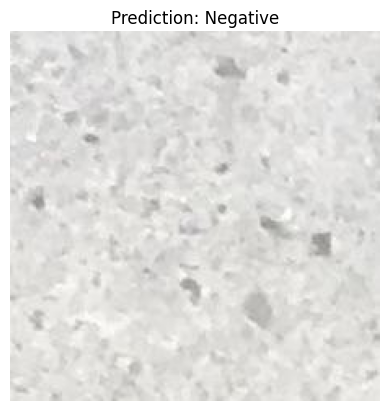

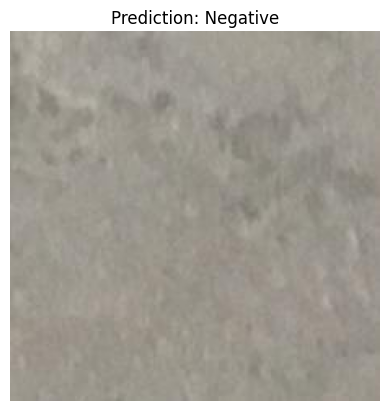

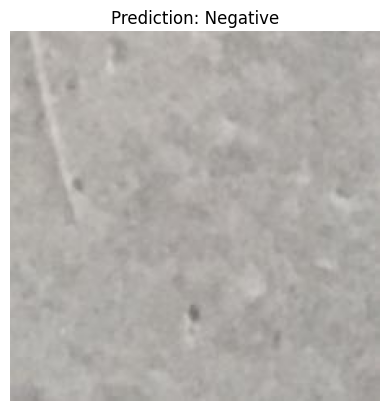

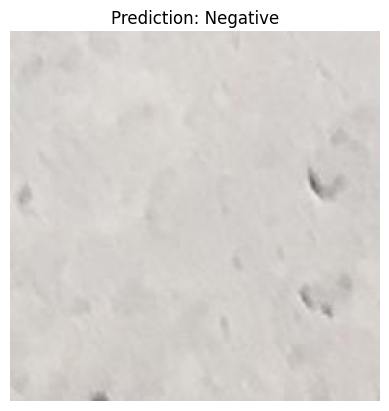

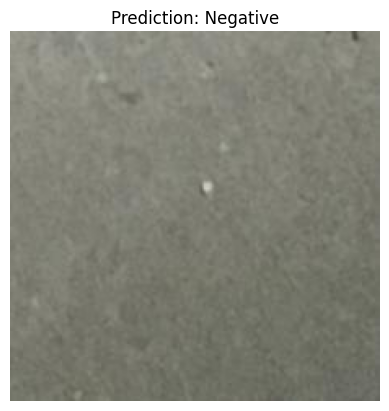

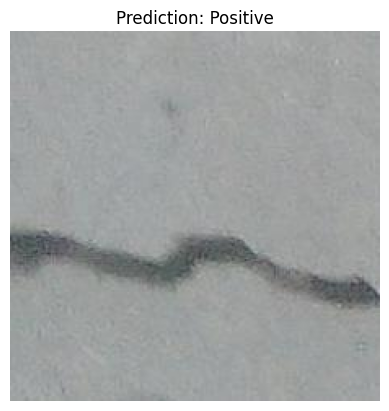

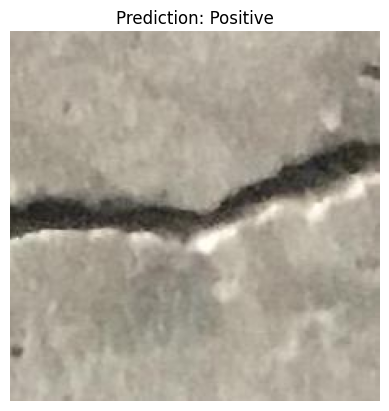

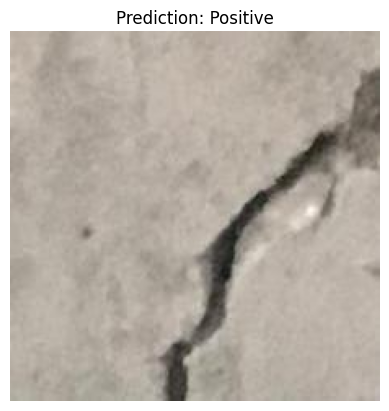

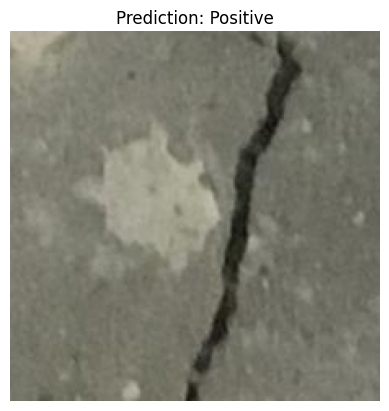

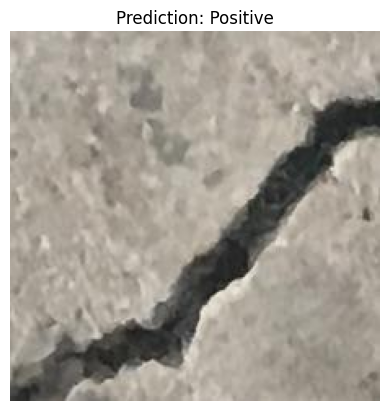

In [14]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from PIL import Image

resnet_model = load_model('TrainedModel.keras')

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    'concrete_data_week4/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

predictions = resnet_model.predict(test_generator, verbose=1)

predicted_classes = np.argmax(predictions, axis=1)

class_labels = ["Negative", "Positive"]

class_indices = test_generator.class_indices
class_indices = {label: np.where(test_generator.classes == i)[0] for i, label in enumerate(class_indices)}

num_images_per_class = 5
for class_label in class_indices:
    indices = class_indices[class_label]
    random_indices = np.random.choice(indices, size=num_images_per_class, replace=False)
    for i in random_indices:
        img_path = test_generator.filepaths[i]
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(f"Prediction: {class_labels[predicted_classes[i]]}")
        plt.axis('off')
        plt.show()

### Thank you for completing this lab!

This notebook was created by Alex Aklson.


This notebook is part of a course on **Coursera** called _AI Capstone Project with Deep Learning_. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week4_LAB1).


<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).
